In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv('/content/StudentPerformanceFactors (1).csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
s=df.copy()

In [ ]:
s.shape

(6607, 20)

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
s.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# 1. What cleaning did you do to the dataset.
 ✅ Removing Duplicates: checked for and ensured there were no duplicated rows.

✅ Handling Missing Values: filled missing values in the following categorical columns using their mode (most frequent value):

Teacher_Quality

Parental_Education_Level

Distance_from_Home

✅ Outlier Treatment: Outliers in numeric columns were capped using the Interquartile Range (IQR) method to avoid skewing the data.

✅ Label Encoding: All categorical columns were converted into numerical values using LabelEncoder so that machine learning algorithms can process them.

In [ ]:
print(s.duplicated().sum())

0


In [ ]:
s.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Fill missing values with mode (most common value) for categorical variables
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home',
           ]:
    s[col].fillna(s[col].mode()[0], inplace=True)

In [ ]:
# After fill missing values again check,
s.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


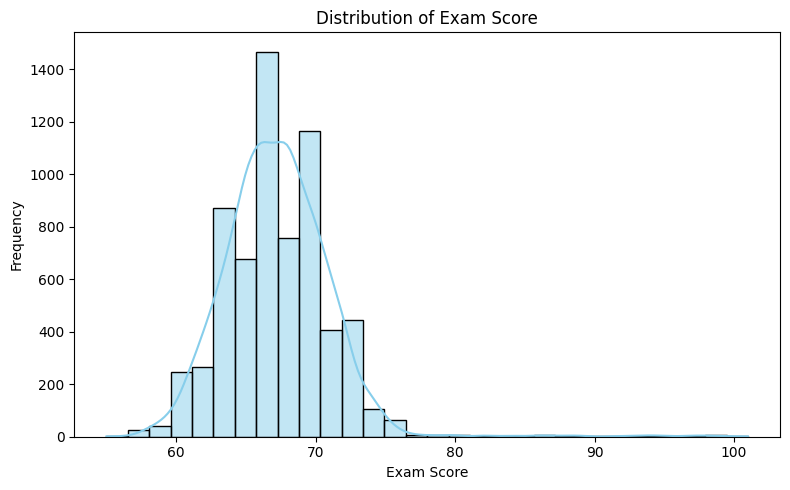

In [ ]:
# Plot 1: Distribution of Exam Score
plt.figure(figsize=(8, 5))
sns.histplot(s['Exam_Score'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

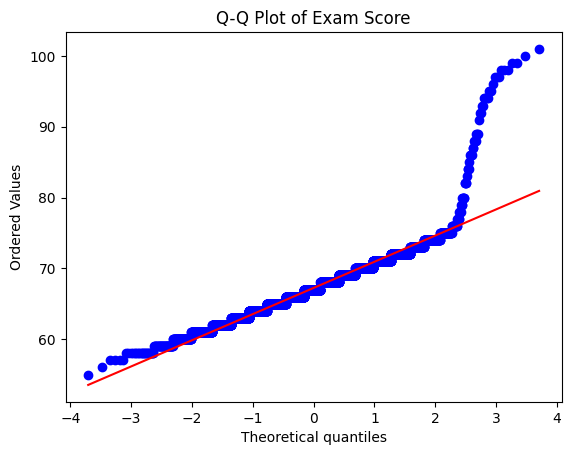

In [ ]:
# Q-Q Plot
stats.probplot(s['Exam_Score'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Exam Score")
plt.show()

# Check outlier by boxplot

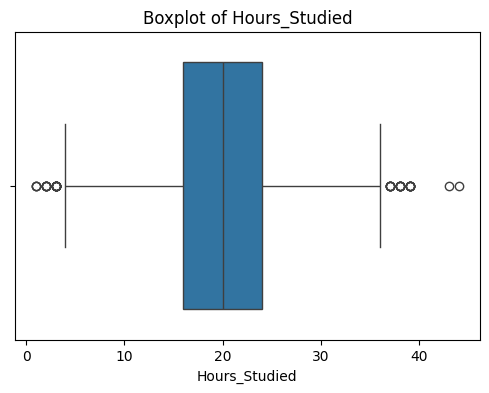

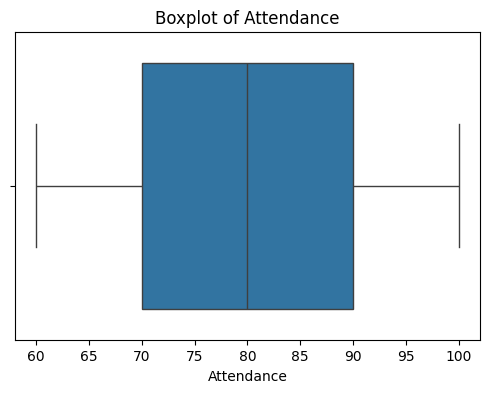

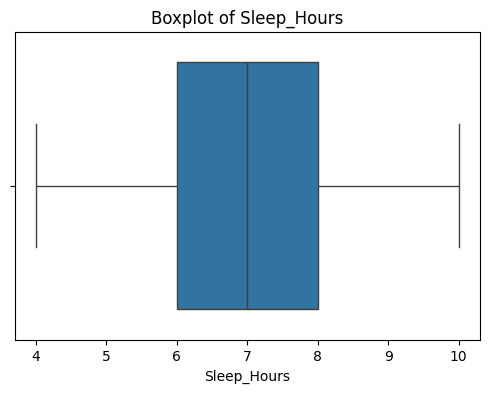

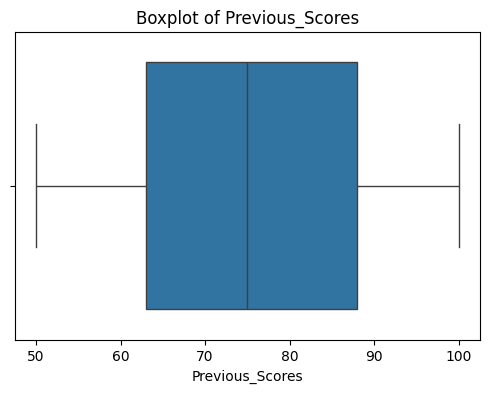

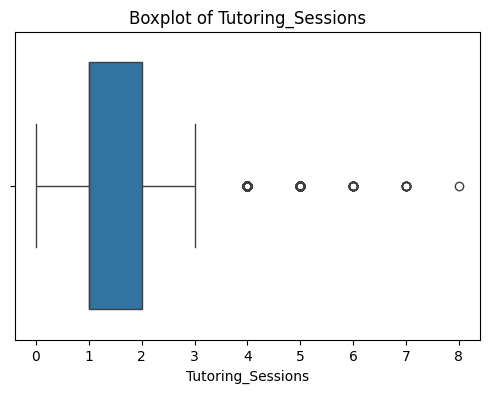

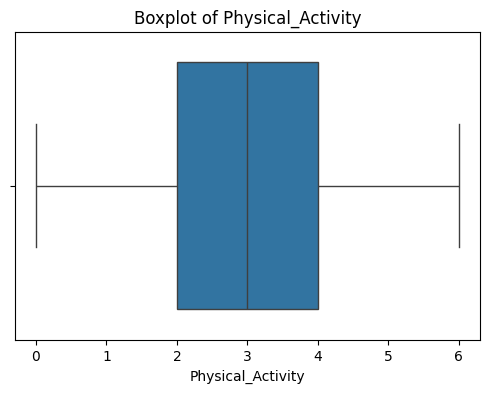

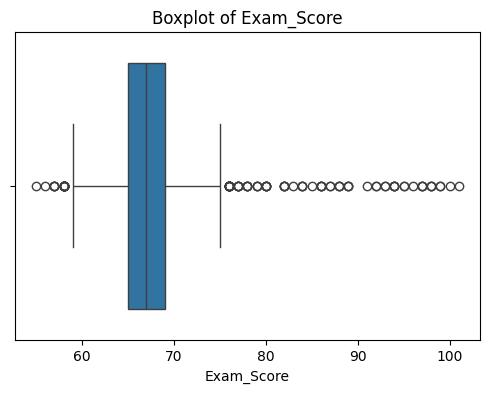

In [ ]:
import seaborn as sns

for col in s.select_dtypes(include='number').columns:  # Loop through numeric columns
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=s[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Capping outliers

In [ ]:
def cap_outliers(s):
    for col in s.select_dtypes(include='number').columns:
        Q1 = s[col].quantile(0.25)
        Q3 = s[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        s[col] = s[col].clip(lower_bound, upper_bound)  # Capping outliers
    return s

s = cap_outliers(s)

After Capping again check outliers

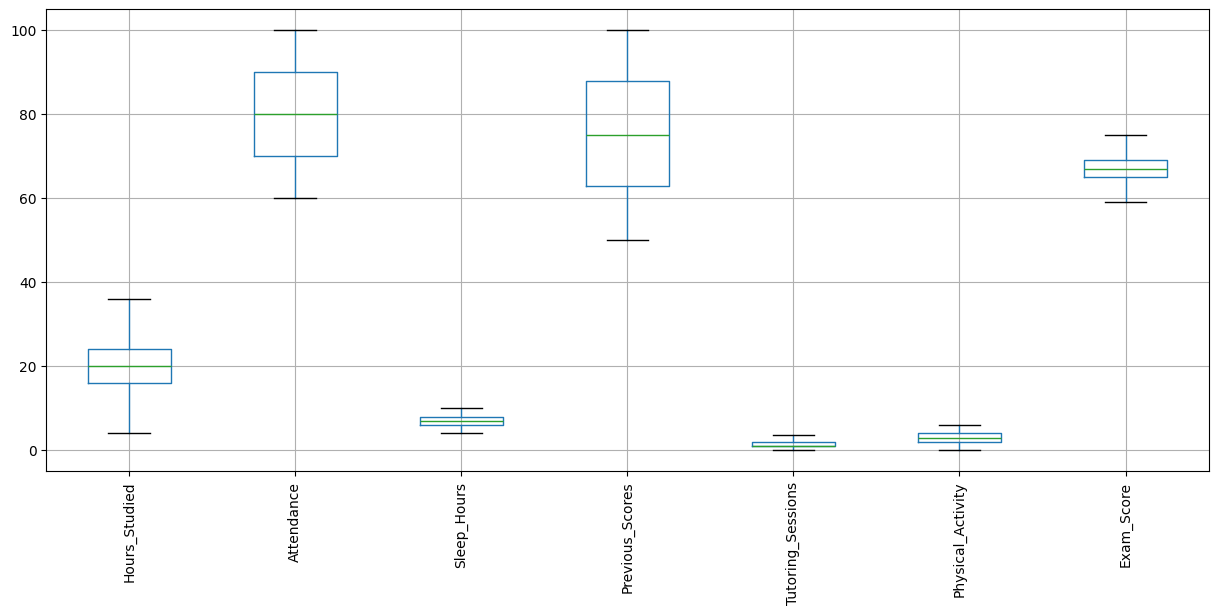

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))  # Adjust figure size
s.boxplot()
plt.xticks(rotation=90)  # Rotate column names
plt.show()

In [ ]:
# Encode all categorical variables using Label Encoding
label_encoders = {}
categorical_cols = s.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    s[col] = le.fit_transform(s[col])
    label_encoders[col] = le

# After using Label Encoding our data look like

In [ ]:
s.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0.0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2.0,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2.0,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1.0,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3.0,2,0,1,1,4,0,0,2,0,70


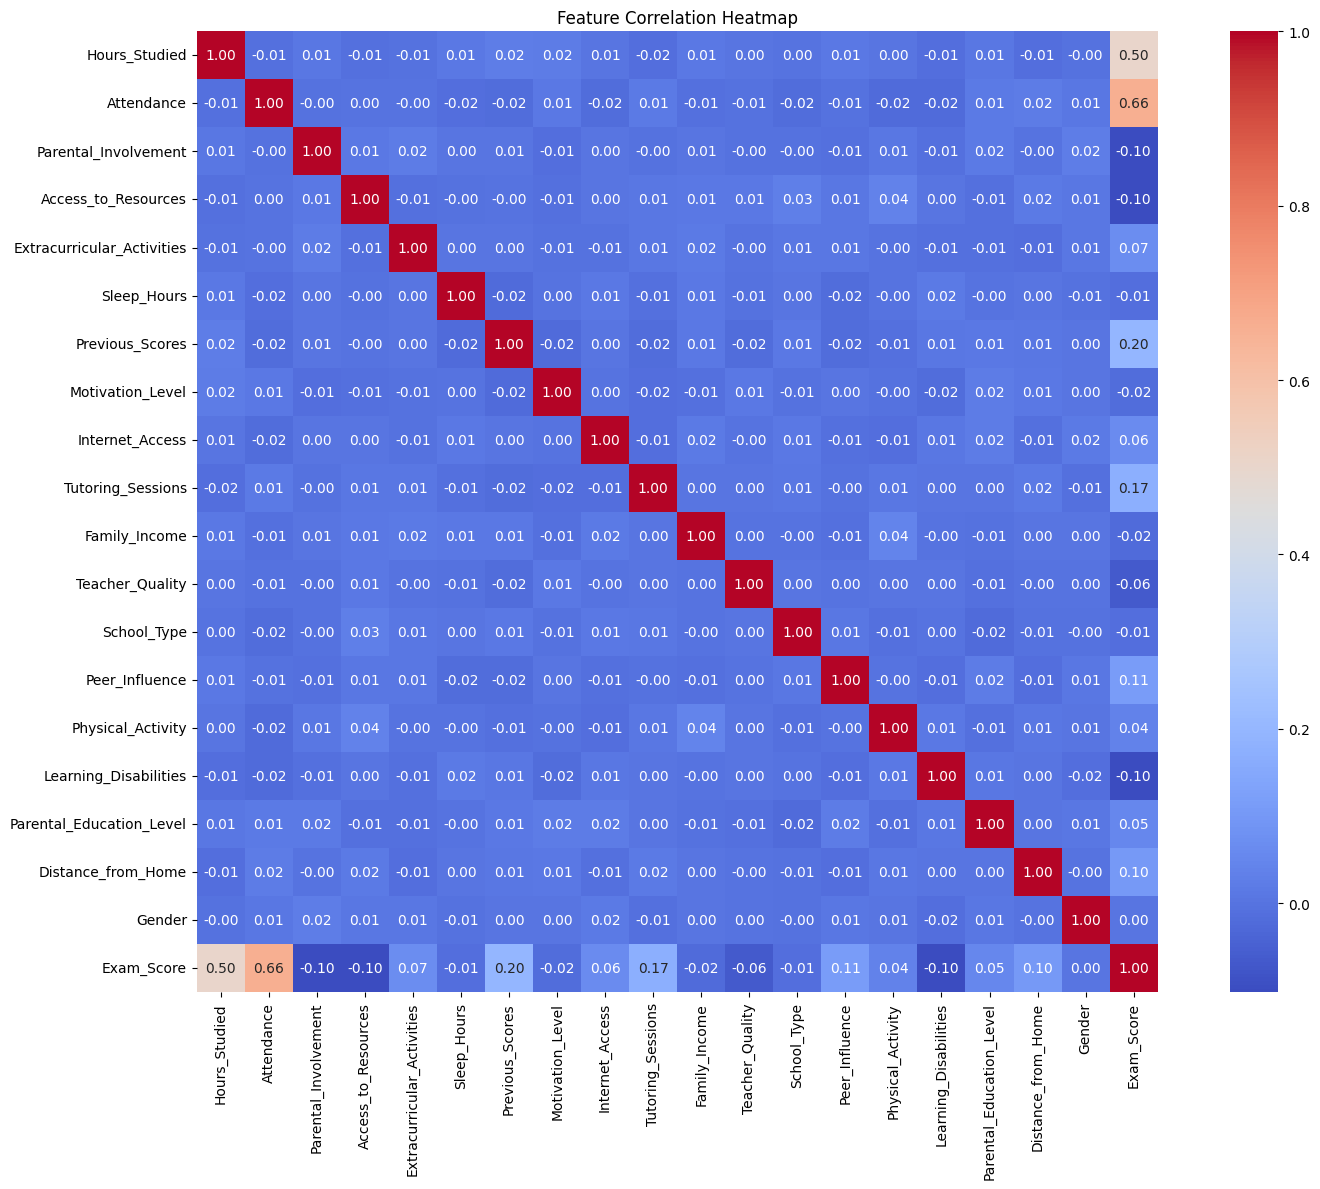

In [ ]:
# Plot 2: Correlation heatmap of all features
plt.figure(figsize=(16, 12))
correlation_matrix = s.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# 2. What prediction did you make? Why is the prediction useful? What real-life problem does it solve?

 I built a model to predict Exam_Score of students based on multiple influencing factors such as:

Study hours, attendance, sleep, internet access, family income, parental education, etc.

Why it’s useful:

It helps identify students at risk of underperforming before actual exams.
Enables teachers and parents to intervene early, offer tutoring, or provide necessary resources.

Real-life problem it solves:

Helps improve student academic performance by targeting specific factors (like sleep hours, tutoring
sessions, parental involvement).
Can be used in education policy-making to identify key performance indicators.

In [ ]:
# Features and target
X = s.drop("Exam_Score", axis=1)
y = s["Exam_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics function
def evaluate_model(name, y_true, y_pred):
    print(f"📈 {name} Performance:")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²:   {r2_score(y_true, y_pred):.3f}\n")

# Evaluate both models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)

📈 Linear Regression Performance:
MAE:  0.94
RMSE: 1.32
R²:   0.845

📈 Random Forest Regressor Performance:
MAE:  0.97
RMSE: 1.34
R²:   0.841



# 3. Which machine learning model is performing better for you?
You compared:

Linear Regression

Random Forest Regressor

In this case, Linear Regression is performing better.
Although Random Forest Regressor is generally known for handling nonlinear relationships and complex interactions, in this particular scenario, Linear Regression has provided better performance.
This could be due to the data being more linearly correlated, making Linear Regression a better fit.

# 4. What does your selected dataset say? Explain it through exploratory data analysis.
From my EDA steps:

Distribution of Exam Scores:

Scores are roughly normally distributed but may have a slight skew.

Q-Q Plot:

Suggests exam scores mostly follow a normal distribution, confirming model suitability.

Boxplots for Numeric Features:

Helped identify and cap outliers, especially in Hours_Studied, Previous_Scores, etc.

Correlation Heatmap:

Reveals strong relationships between variables like Previous_Scores, Hours_Studied, and the target
Exam_Score.
Features like Attendance, Motivation_Level, and Parental_Involvement also show positive correlation.